# Анализ данных об играх на различных консолях

<div style="text-align: justify; text-indent: 25px;"> В настоящем проекте исследуются исторические данные из открытых источников о продажах игр, включающие в себя оценки пользователей и экспертов, жанры и платформы, год выпуска, количество продаж по регионам и возрастной рейтинг. Данные представлены по 2016 год включительно. Цель: выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год для интернет-магазина «Стримчик», занимающегося продажами по всему миру.  
</div>

# Оглавление:
---------------------------

1. [Загрузка библиотек и исходных данных](#1)
2. [Предобработка данных](#2)
3. [Исследовательский анализ данных](#3)
4. [Портрет пользователя каждого региона](#4)
5. [Проверка гипотез](#5)
6. [Вывод](#6)

<a name="1"></a>

## Загрузка библиотек и исходных данных

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np

Загрузим данные и посмотрим на общую информацию:

In [2]:
df = pd.read_csv('datasets/games.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Как видно, названия столбцов не всегда соответствуют нижнему регистру, а также имеются пропуски в столбцах с именем, годом выпуска, жанром, оценкой критиков, оценкой пользователей и рейтингом ESRB. Кроме того, оценка пользователей имеет тип object.

<a name="2"></a>

## Предобработка данных

Заменим названия столбцов, приведя их к нижнему регистру:

In [3]:
start_size = len(df)

df.columns = df.columns.str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В столбцах *name*, *genre* и *year_of_release*, где количество пропусков не велико (менее 2%), удалим строки с пропусками:

In [4]:
print((df.isna().sum()/len(df)*100).round(3).rename('Процент пропусков'),'\n\n')
df = df.dropna(subset=['name', 'genre', 'year_of_release'])
df.info()

name                0.012
platform            0.000
year_of_release     1.609
genre               0.012
na_sales            0.000
eu_sales            0.000
jp_sales            0.000
other_sales         0.000
critic_score       51.319
user_score         40.090
rating             40.479
Name: Процент пропусков, dtype: float64 


<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating    

Заменим типы столбцов *year_of_release* (на int) и *user_score* (на float). Заметим, что среди значений столбца *user_score* встречается значение 'tbd' (т.е. to be determined), означающее, что пользователи поставили недостаточно оценок для определения среднего балла. Такие значения будут приведены к nan:

In [5]:
df.loc[:, 'year_of_release'] = df['year_of_release'].astype('int')
df.loc[:, 'user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Проведём проверку на явные и неявные дубликаты. Явных дубликатов нет. Одна строка повторяется дважды с отличием только в продажах. Продажи были суммированы, а дубликат удалён:

In [6]:
print('Явные дубликаты:', df.duplicated().sum())
print('Неявные дубликаты:', df[['name', 'platform', 'year_of_release']].duplicated().sum())
display(df[df[['name', 'platform', 'year_of_release']].duplicated(keep=False)])
df.loc[600, 'eu_sales'] += df.loc[15969, 'eu_sales']
df = df.drop(15969, axis=0)

Явные дубликаты: 0
Неявные дубликаты: 1


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Рассчитаем суммарные продажи по всем регионам в отдельном столбце:

In [7]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Проанализируем пропуски в столбце *user_score*. Рассмотрим по платформам количество игр, количество продаж, долю пропусков и продажи для игр без оценок. Как можно видеть, доля пропусков сильно отличается по платформам и для многих даже относительно популярных платформ доходит до 100%. В целом без оценок остались скорее менее популярные и старые игры или игры от японских издателей, однако порой пропуски затрагивают и иные игры (например, CoF: Black Ops 3 на PS4 с 14+ млн продаж). Учитывая такую неоднородность и неслучайность пропусков, а также их неочевидное происхождение, восстановить их не представляется возможным. Удалить их тоже нельзя, так как их слишком много. Значит, придётся их оставить:

In [8]:
plat_stat = df.groupby('platform')['total_sales'].agg(['count', 'sum']).sort_values(by='sum')
c = [round(df[df['platform']==p]['user_score'].isna().sum()/len(df[df['platform']==p]), 3) for p in df['platform'].unique()]
plat_stat['user_score_nan_rate'] = (pd.Series([df[df['platform']==p]['user_score'].isna().sum()/len(df[df['platform']==p]) 
                                               for p in df['platform'].unique()], index=df['platform'].unique()).round(2))
plat_stat['user_score_nan_sales'] = (pd.Series([df[df['user_score'].isna() & (df['platform']==p)]['total_sales'].sum()
                                                for p in df['platform'].unique()], index=df['platform'].unique()).round(2))
print(plat_stat)

(df[df['user_score'].isna()][['name', 'total_sales', 'year_of_release', 'platform']]
 .sort_values(by='total_sales', ascending=False).head(20).reset_index(drop=True))

          count      sum  user_score_nan_rate  user_score_nan_sales
platform                                                           
PCFX          1     0.03                 1.00                  0.03
GG            1     0.04                 1.00                  0.04
3DO           3     0.10                 1.00                  0.10
TG16          2     0.16                 1.00                  0.16
WS            6     1.42                 1.00                  1.42
NG           12     1.44                 1.00                  1.44
SCD           6     1.86                 1.00                  1.86
DC           52    15.95                 0.73                 11.40
GEN          27    28.35                 1.00                 28.35
SAT         173    33.59                 1.00                 33.59
PSV         429    53.81                 0.67                 19.54
WiiU        147    82.19                 0.32                 14.98
2600        116    86.48                 1.00   

,name,total_sales,year_of_release,platform
0,Super Mario Bros.,40.24,1985.0,NES
1,Pokemon Red/Pokemon Blue,31.38,1996.0,GB
2,Tetris,30.26,1989.0,GB
3,Duck Hunt,28.31,1984.0,NES
4,Nintendogs,24.67,2005.0,DS
5,Pokemon Gold/Pokemon Silver,23.09,1999.0,GB
6,Super Mario World,20.62,1990.0,SNES
7,Pokemon Diamond/Pokemon Pearl,18.24,2006.0,DS
8,Super Mario Land,18.14,1989.0,GB
9,Super Mario Bros. 3,17.28,1988.0,NES


Рассмотрим последний столбец с пропусками *rating*. Для начала, отметим, что значение рейтинга 'K-A' аналогично 'E' ('Для всех') и использовалось вместо него в 1994-1998 годах. Значение 'EC' ('Для детей младшего возраста') использовалось в 1994-2018 годах, а затем было объединено с 'E'. Значение 'RP' ('Рейтинг ожидается') в данном случае аналогично nan (впрочем, такое значение всего одно). Единственная игра с рейтигом Adults Only (GTA: San Andreas) выпущена в 2005 году и при отборе актуальных данных наверняка отпадёт, оставив лишь 4 значения рейтинга (E, E10, T, M). В соответствии с этим произведём замену значений, а затем заполним пропущенные значения рейтинга на 'Unknown':

In [9]:
print(df['rating'].unique())
df['rating'] = df['rating'].replace(to_replace={'K-A':'E', 'EC':'E', 'RP':float('nan')})
l = ['E', 'E10+', 'T', 'M', 'AO']
print(df['rating'].value_counts().loc[l])
print(df['rating'].isna().sum())
df.loc[df['rating'].isna(), 'rating'] = 'Unknown'
print(df.loc[df['rating']=='AO', ['name', 'year_of_release']])
df.info()

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
rating
E       3932
E10+    1393
T       2905
M       1536
AO         1
Name: count, dtype: int64
6676
                              name  year_of_release
875  Grand Theft Auto: San Andreas           2005.0
<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64

В рамках предобработки данных были удалены дубликаты и пропуски в некоторых столбцах, изменён тип данных и создан новый столбец с суммарными продажами по всем регионам. Пропуски в данных о рейтинге заменены на значение 'Unknown', пропуски в оценках пользователей и критиков пришлось оставить. Подведём итог, посчитав процент оставшихся данных:

In [10]:
print(f'Доля оставшихся данных: {len(df)/start_size:.2%}')
df.reset_index(drop=True, inplace=True)
df

Доля оставшихся данных: 98.37%


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16438,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16439,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16440,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16441,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown,0.01


<a name="3"></a>

## Исследовательский анализ данных 

Посмотрим на выпуск игр в разные годы. Бросается в глаза, что объём рынка вырос до сравнимого с современным только к 2001-2002 году и предыдущий период незначим для анализа:

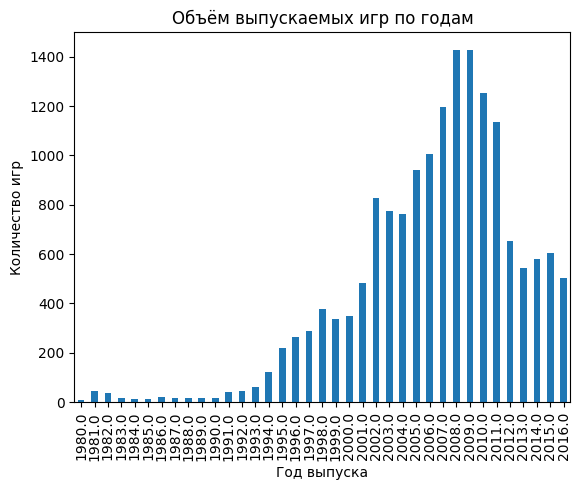

In [11]:
df.groupby('year_of_release')['name'].count().plot(kind='bar')
plt.title('Объём выпускаемых игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

Построим распределение продаж игр для 5 самых популярных платформ по годам. Как можно видеть, в зависимости от успешности платформы её срок жизни среди популярных платформ составляет  от 5 (GameCube, 2001-2005) до 9 (PS2, 2000-2008) лет. Исключение - ПК, доля продаж для которого невелика, но стабильна:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


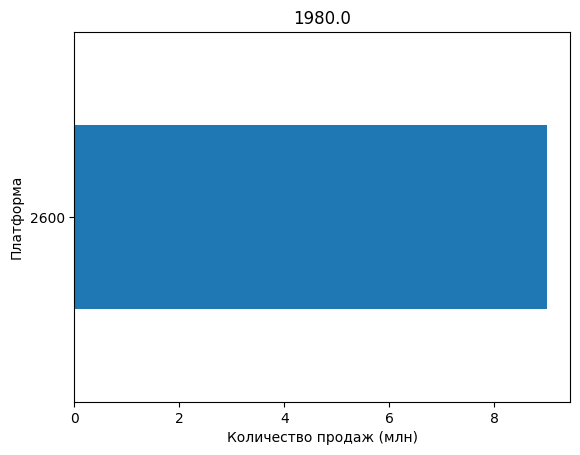

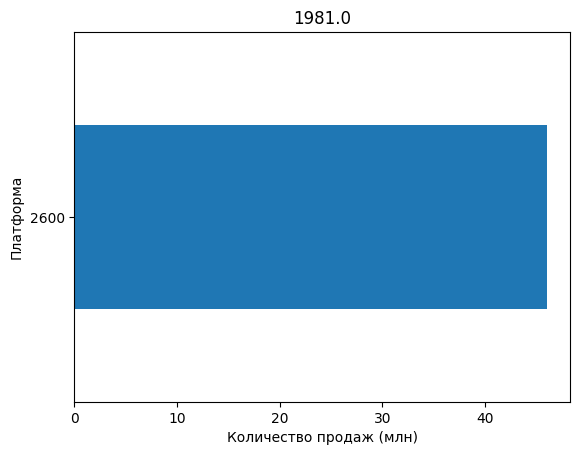

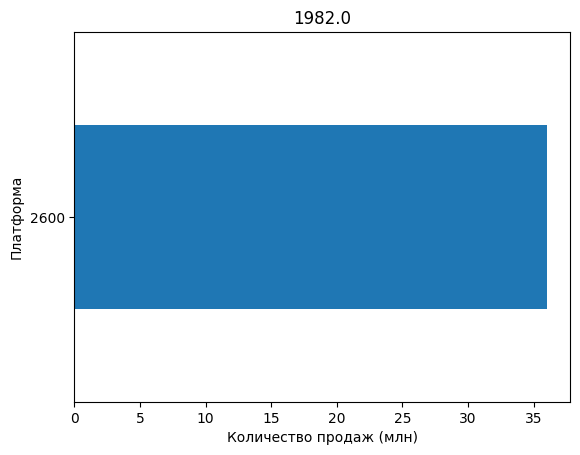

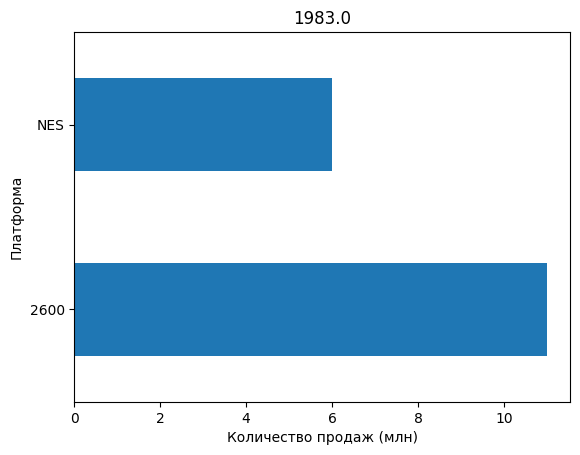

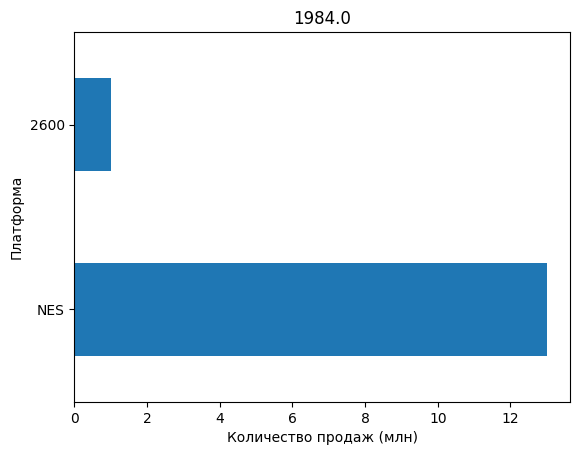

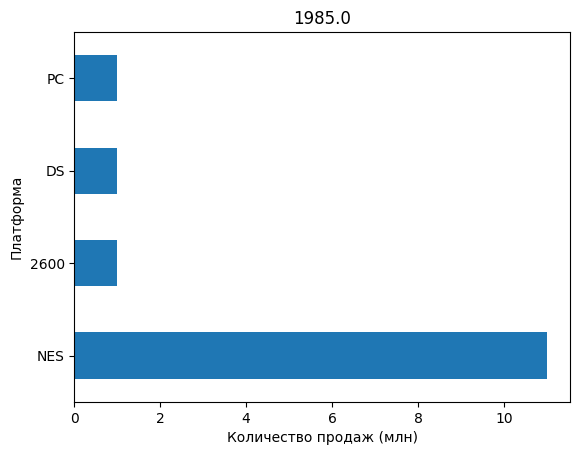

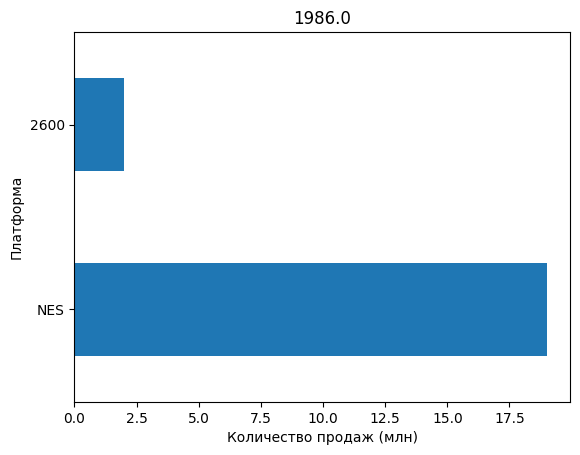

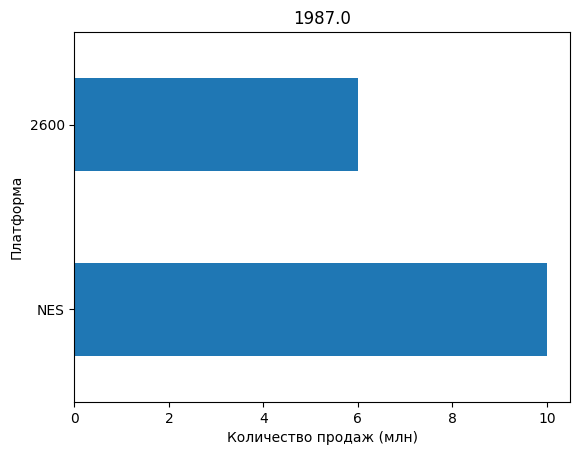

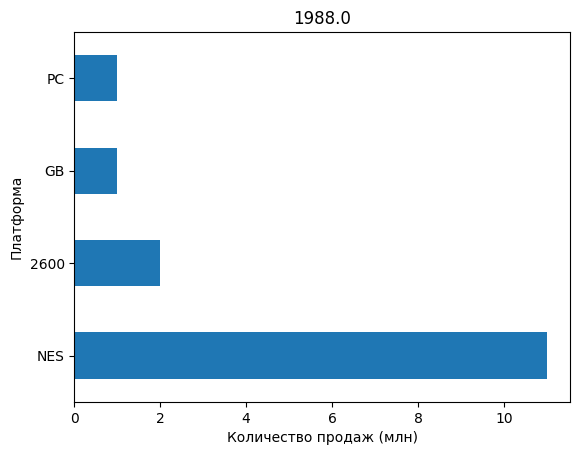

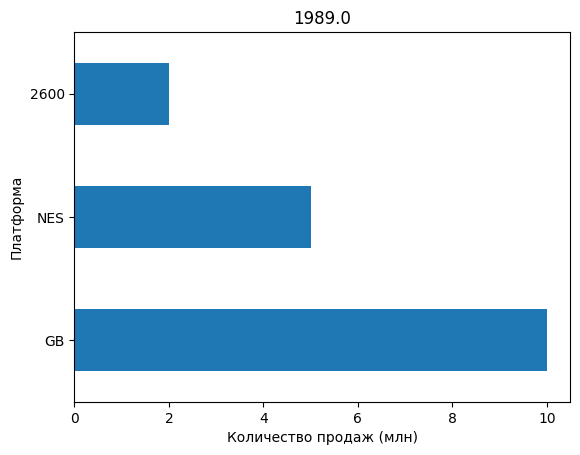

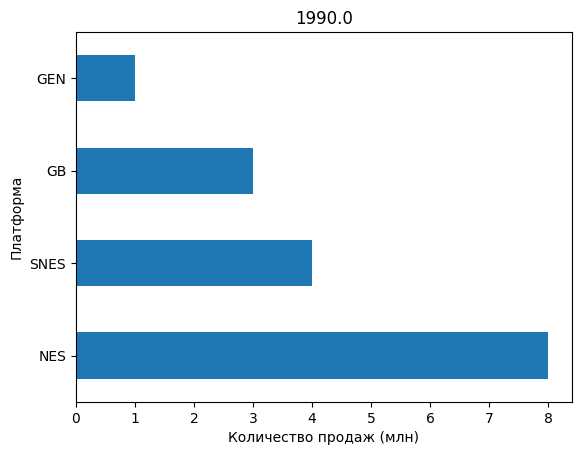

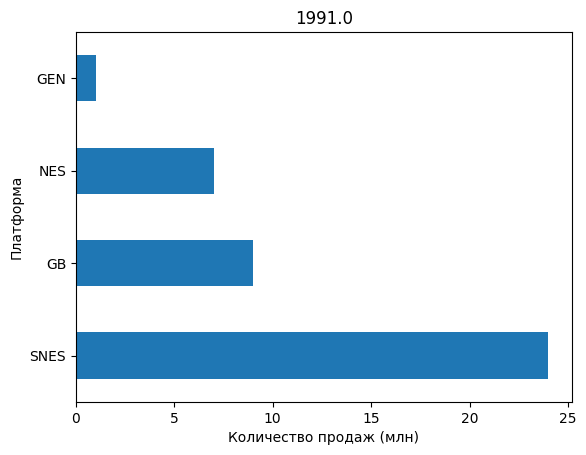

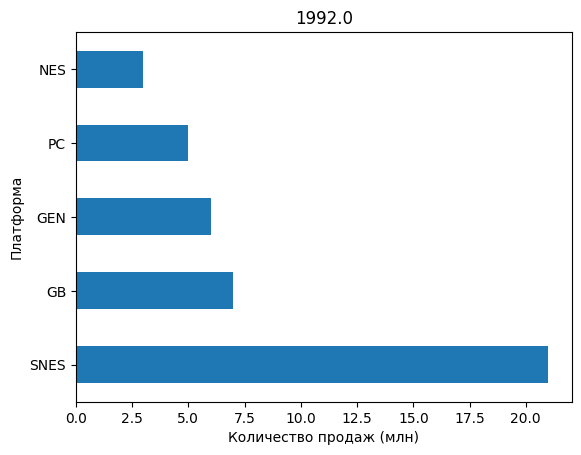

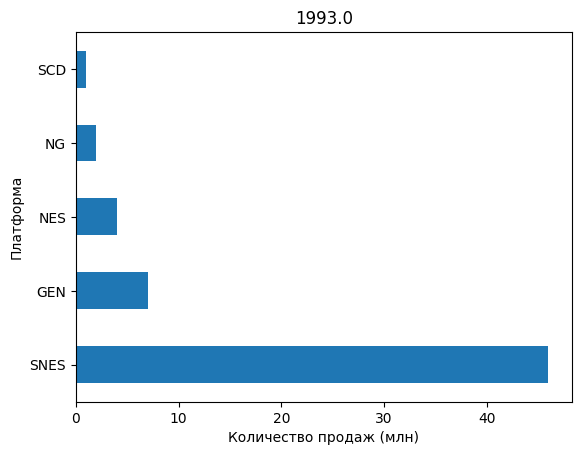

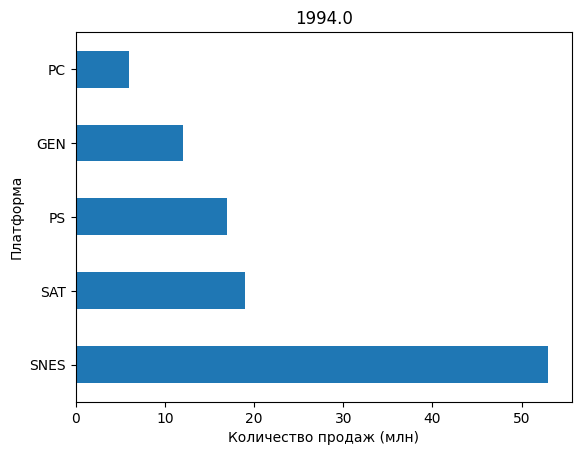

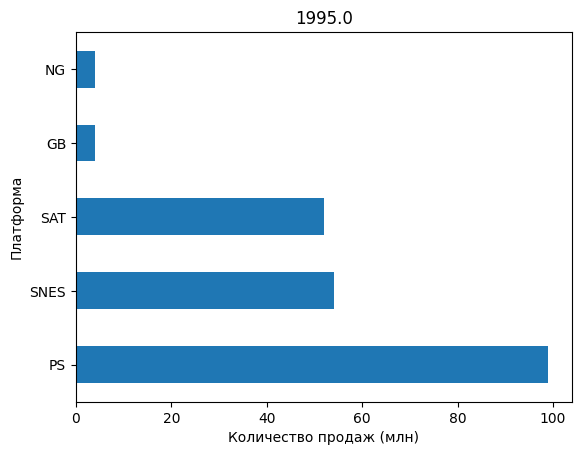

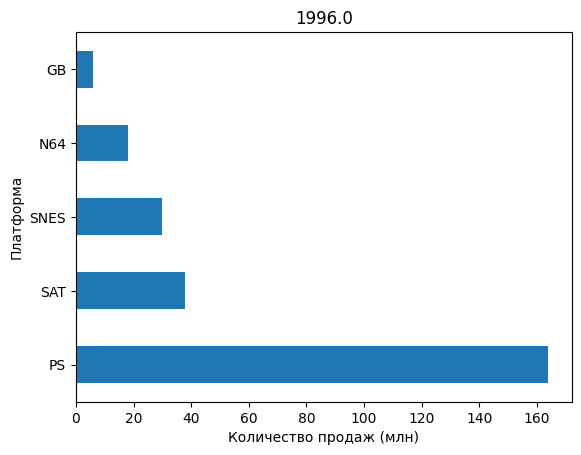

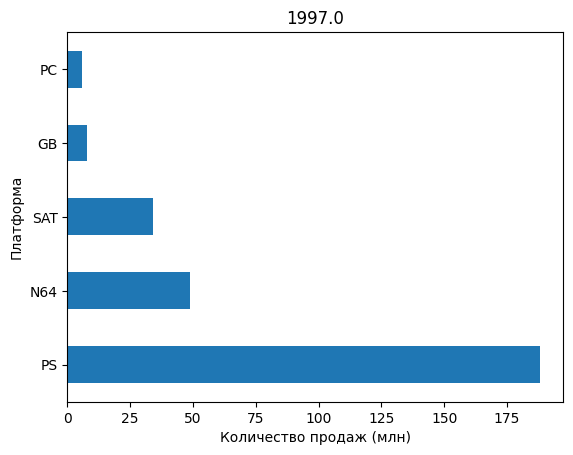

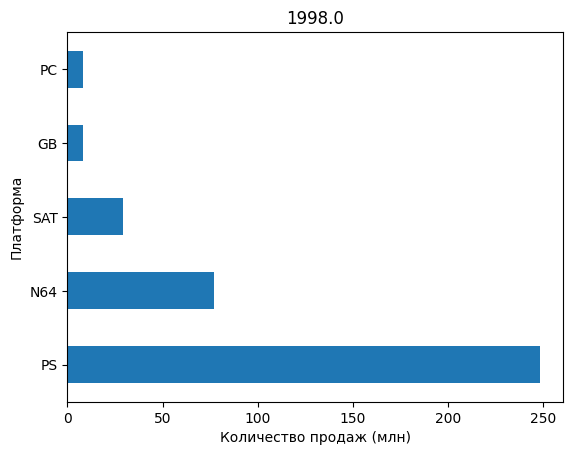

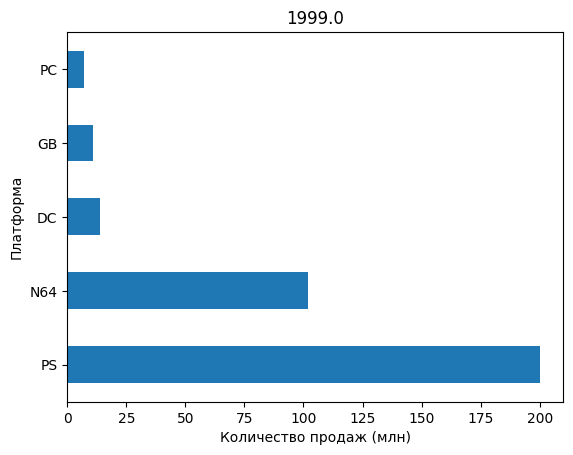

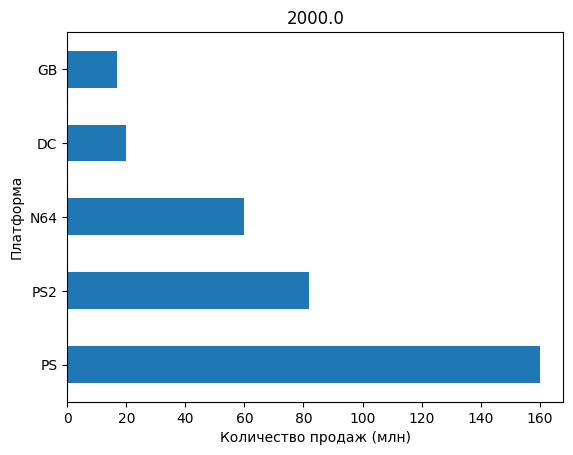

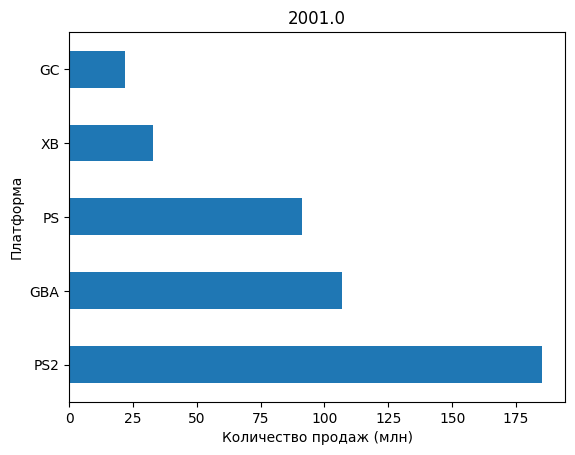

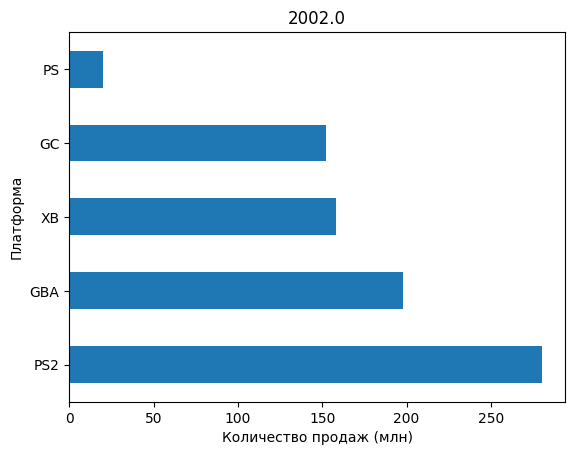

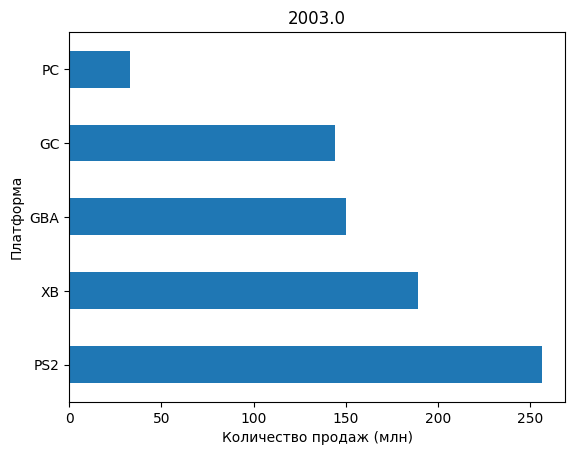

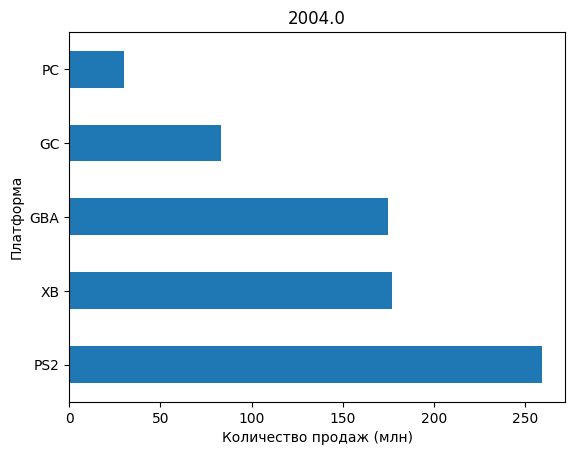

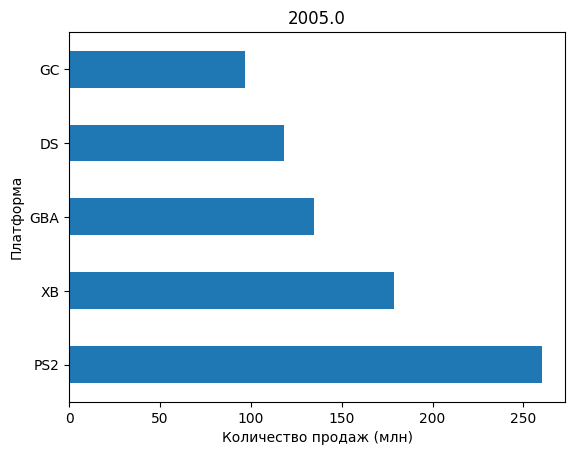

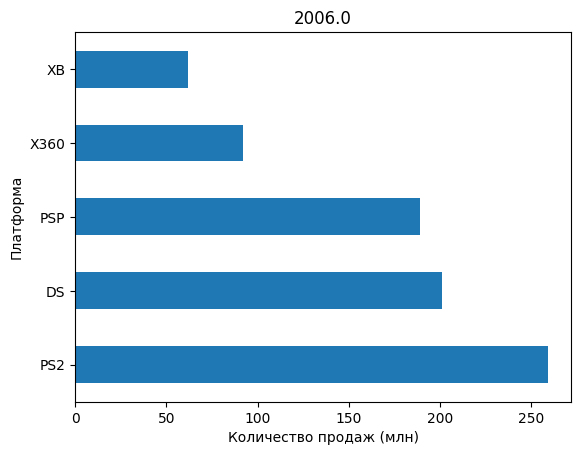

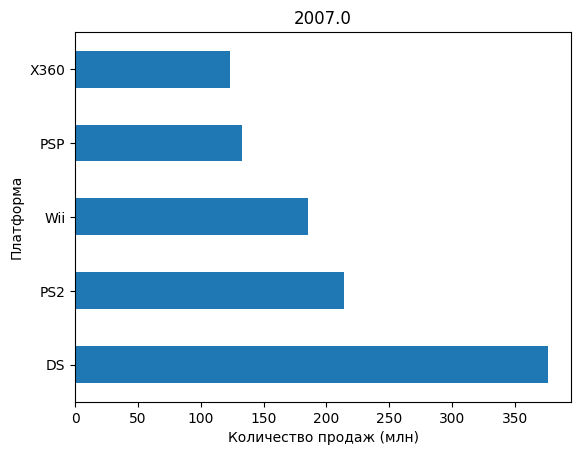

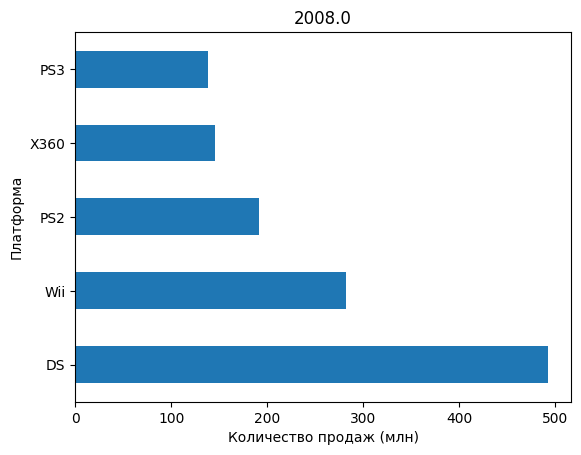

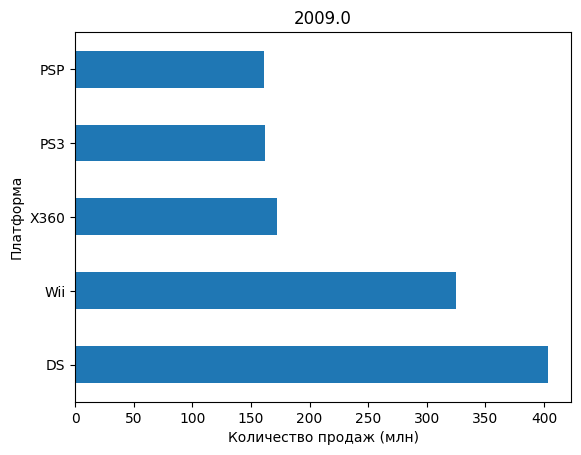

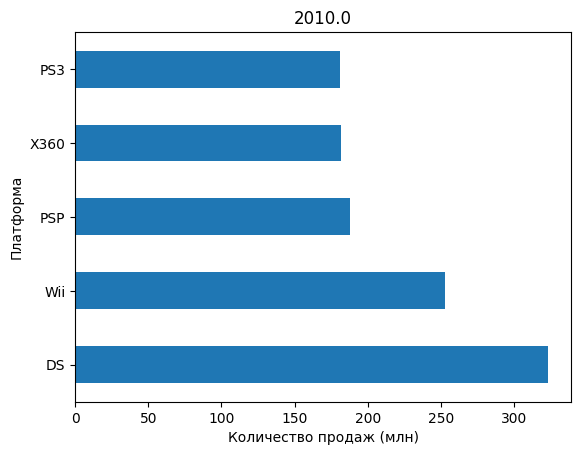

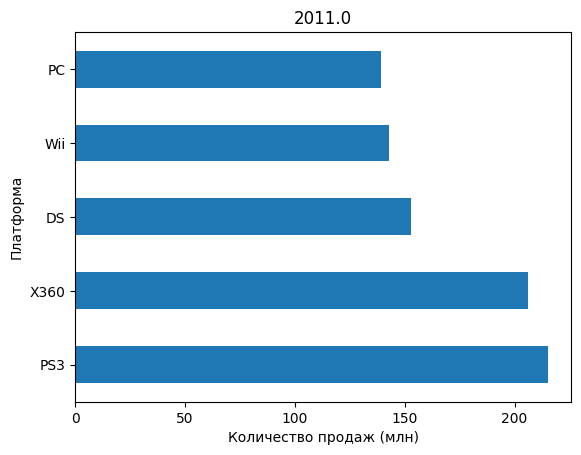

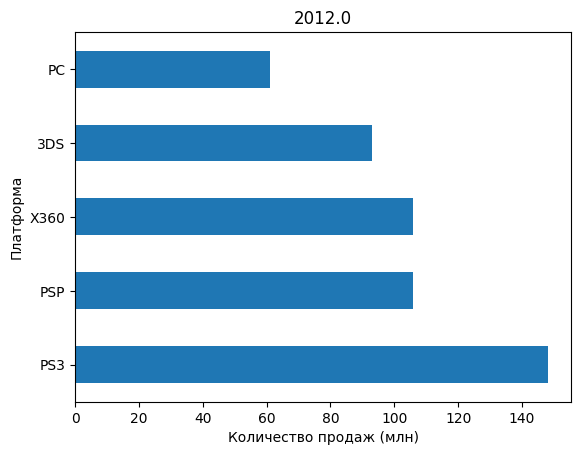

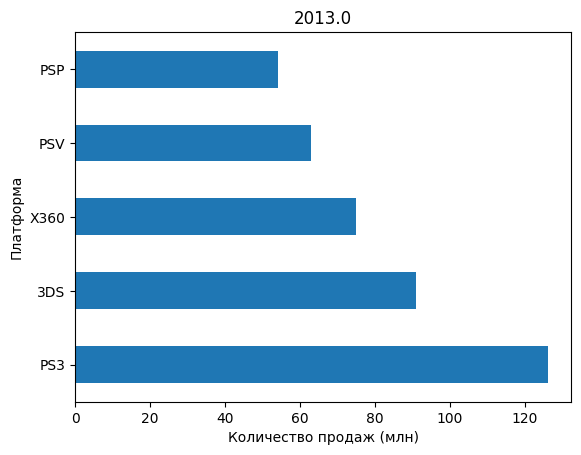

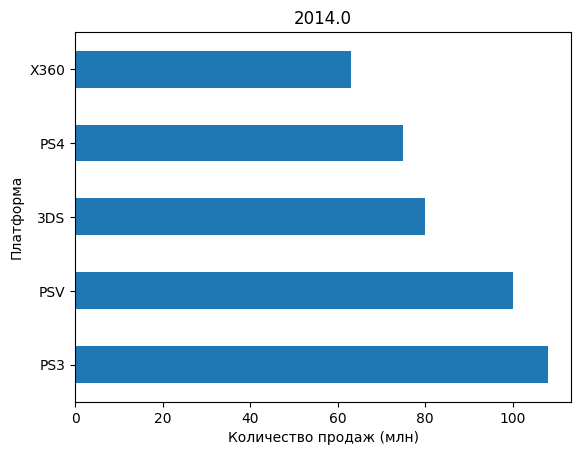

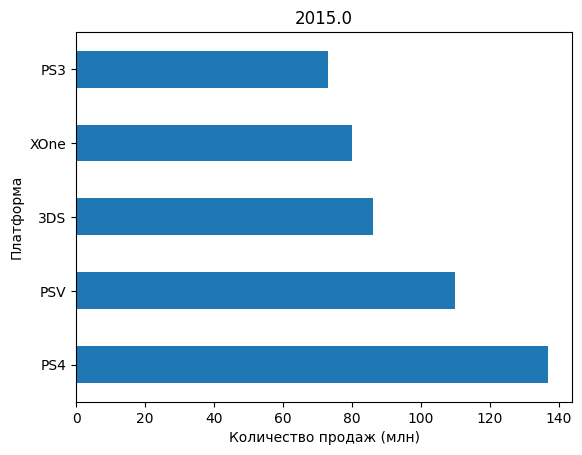

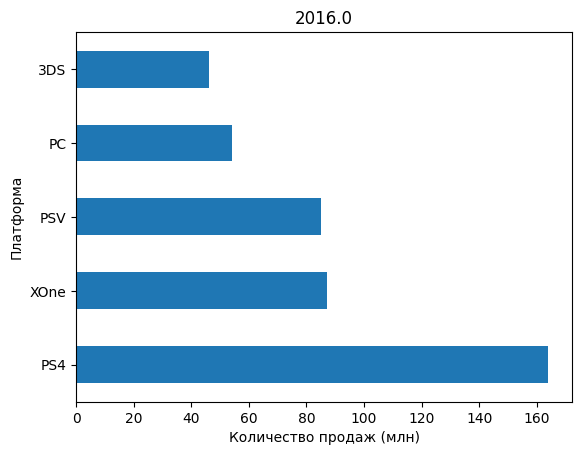

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980.0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981.0,46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1982.0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1983.0,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1985.0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986.0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987.0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1988.0,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df.info()
for y in sorted(df['year_of_release'].unique()):
    df[df['year_of_release']==y].groupby('platform')['year_of_release'].count().sort_values(ascending=False).head(5).plot(kind='barh')
    plt.title(y)
    plt.xlabel('Количество продаж (млн)')
    plt.ylabel('Платформа')
    plt.show()
df.pivot_table(index='year_of_release', columns='platform', values='genre', aggfunc='count').replace(float('nan'), 0).astype(int)


Выберем из представленного набора данных сведения за те года, которые помогут построить прогноз на 2017 год. Основные платформы восьмого поколения, актуального на 2016-2017 год, вышли в 2011-2013 году (приставки Wii U, Xbox One и PS4, портативные консоли Nintendo 3DS и PS Vita). Чтобы минимизировать влияние платформ 7 поколения в данных, выберем 2013 год в качестве границы для фильтрации:

In [13]:
df = df[df['year_of_release']>=2013]

Как можно видеть, наибольшие продажи в 2016 году у PS4 (164 млн), Xbox One (87 млн), PSV (83 млн), ПК (54 млн), Nintendo 3DS (46 млн), PS3 (38 млн), Wii U (14 млн) и Xbox 360 (13 млн). При этом приставки 8 поколения показывают рост (за исключением провальной Wii U), продажи портативных консолей падают (Nintendo 3DS, PS Vita), продажи приставок 7 поколения падают стремительно и вероятно почти дойдут до 0 в 2017 году (Xbox 360 и PS3). Доля ПК показывает некоторый рост в последние годы с 38 млн в 2013 году до 54 млн в 2016. Вероятно, именно у PS4, Xbox One и ПК есть наибольшая вероятность продемонстрировать рост и высокие результаты продаж в 2017 году:

In [14]:
df.pivot_table(index='year_of_release', columns='platform', values='genre', aggfunc='count').replace(float('nan'), 0).astype(int)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013.0,91,8,38,126,16,54,63,12,42,75,19
2014.0,80,0,47,108,75,10,100,6,31,63,61
2015.0,86,0,50,73,137,3,110,4,28,35,80
2016.0,46,0,54,38,164,0,85,1,14,13,87


Построим «ящик с усами» по глобальным продажам игр в разбивке по платформам и выведем основные статистики. Можно видеть, что на актуальных платформах основная часть игр (более 75%) имеет от 0.11 до 0.8 млн продаж. При этом обычно существует целая группа игр с большими продажами (максимально от 1.96 до 21.05 млн):

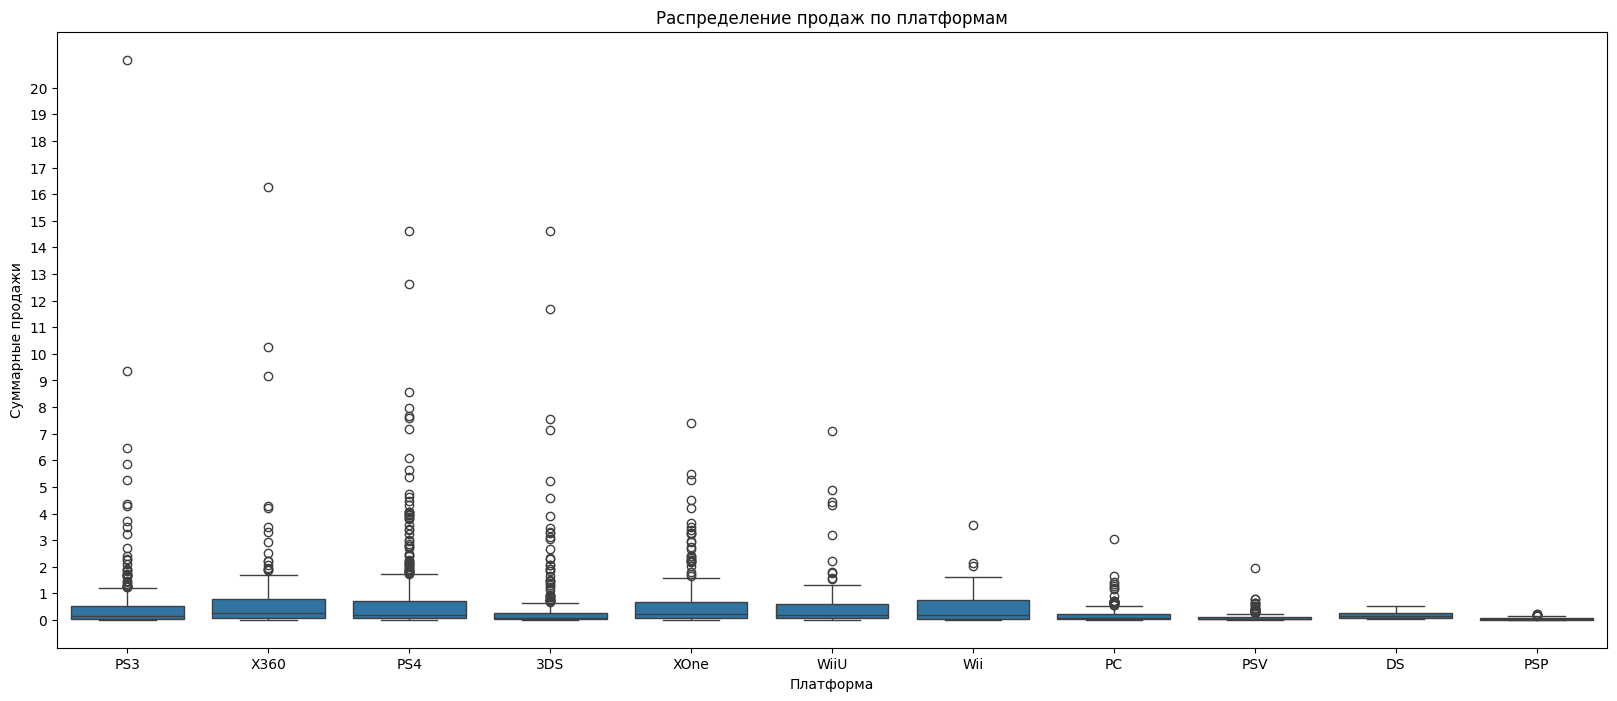

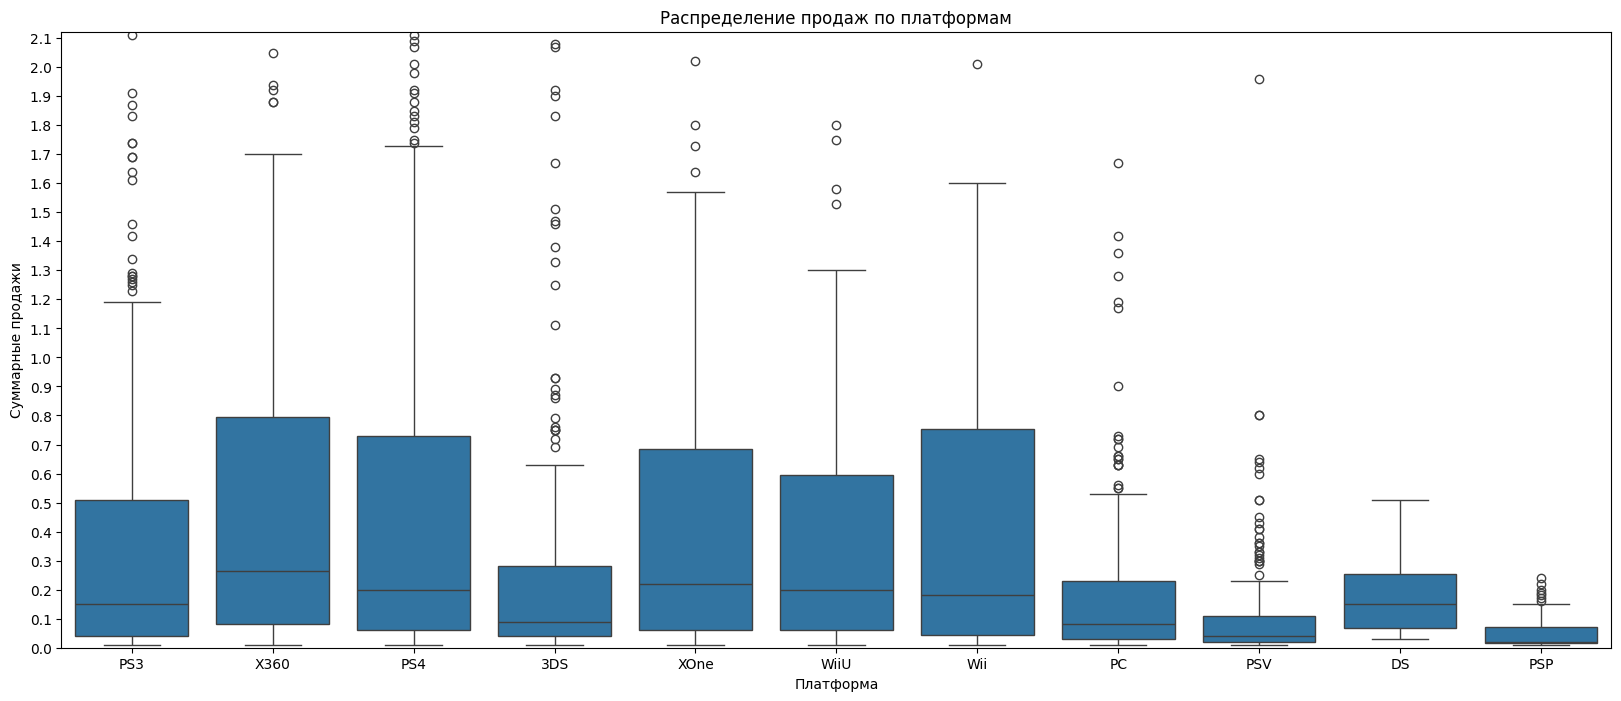

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
X360,186.0,0.735484,1.663275,0.01,0.0800,0.265,0.7950,16.27
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
XOne,247.0,0.645020,1.036139,0.01,0.0600,0.220,0.6850,7.39
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96


In [15]:
plt.figure(figsize=(20,8))
sns.boxplot(x='platform', y='total_sales', data=df)
plt.ylabel('Суммарные продажи')
plt.xlabel('Платформа')
plt.yticks(range(int(df['total_sales'].max())))
plt.title('Распределение продаж по платформам')
plt.show()

plt.figure(figsize=(20,8))
sns.boxplot(x='platform', y='total_sales', data=df)
plt.ylabel('Суммарные продажи')
plt.xlabel('Платформа')
top = df['total_sales'].quantile(0.95)
plt.ylim(0, top)
plt.yticks(np.arange(0, top, 0.1))
plt.title('Распределение продаж по платформам')
plt.show()

df.groupby('platform')['total_sales'].describe().sort_values(by='max', ascending=False)

Выберем несколько популярных платформ и посмотрим на соотношение отзывов пользователей (критиков) и продаж внутри них, построив диаграмму рассеяния и посчитав коэффициент корреляции. Как видно, корреляция очень слабая во всех случаях (коэффициент не превышает 0.42):

Корреляция продаж и отзывов пользователей для платформы PS4: -0.032
Корреляция продаж и отзывов критиков для платформы PS4: 0.407
Корреляция продаж и отзывов пользователей для платформы WiiU: 0.419
Корреляция продаж и отзывов критиков для платформы WiiU: 0.376
Корреляция продаж и отзывов пользователей для платформы XOne: -0.0689
Корреляция продаж и отзывов критиков для платформы XOne: 0.417
Корреляция продаж и отзывов пользователей для платформы PC: -0.0938
Корреляция продаж и отзывов критиков для платформы PC: 0.196
Корреляция продаж и отзывов пользователей для платформы PSV: 0.000942
Корреляция продаж и отзывов критиков для платформы PSV: 0.255


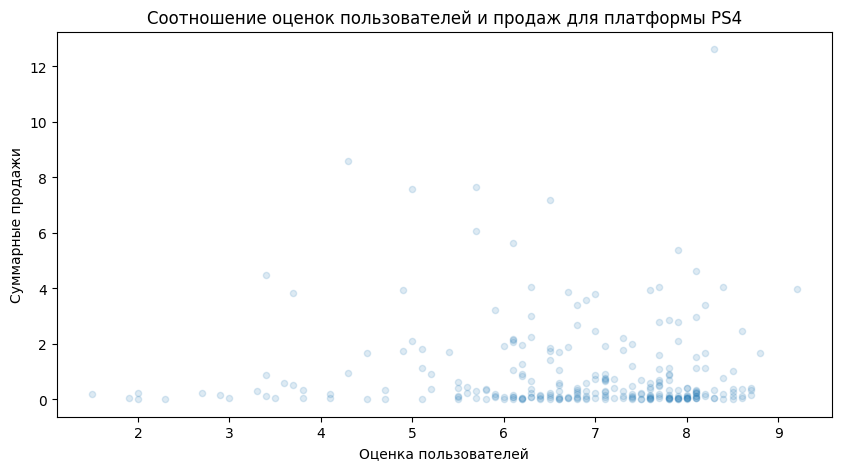

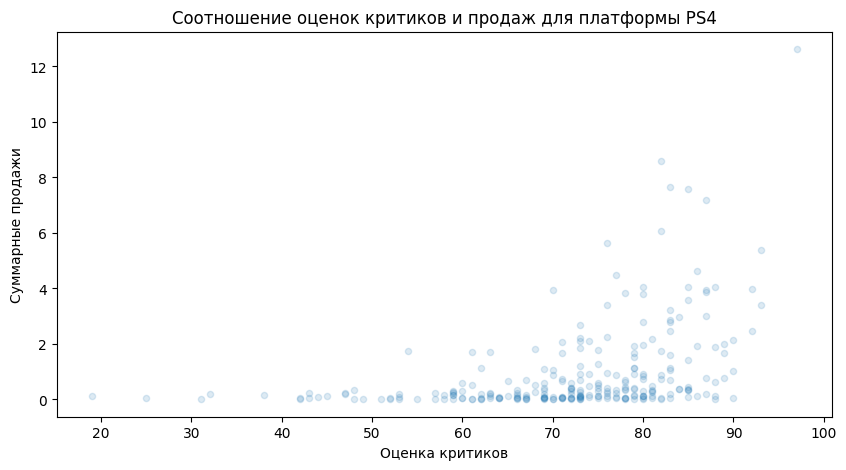

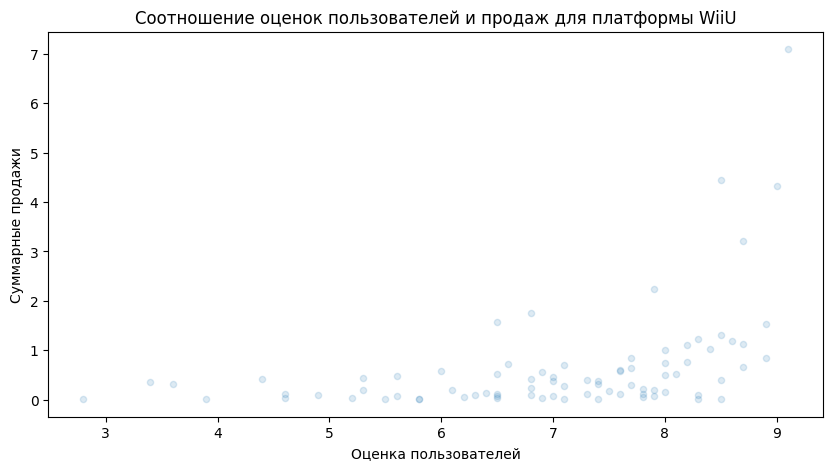

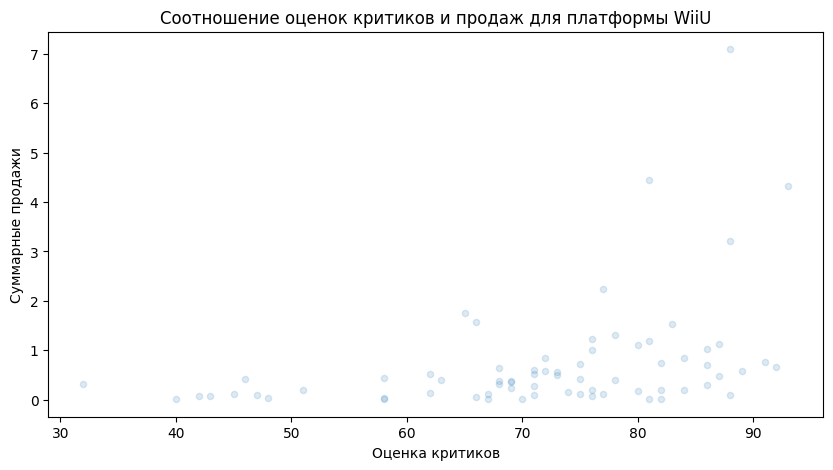

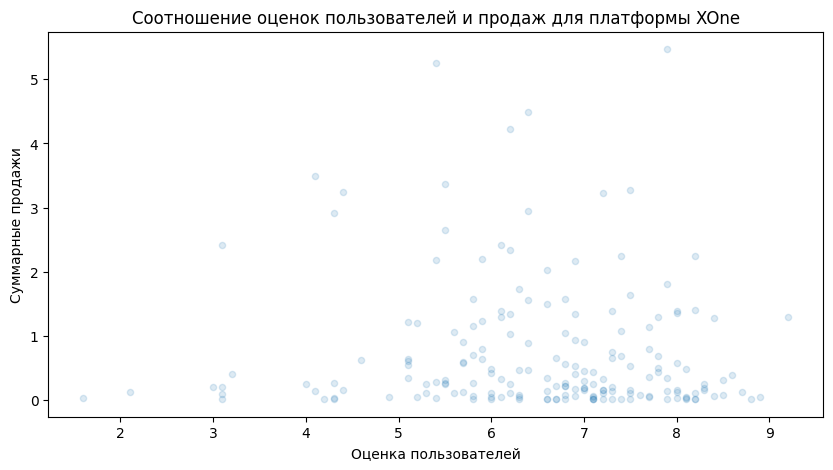

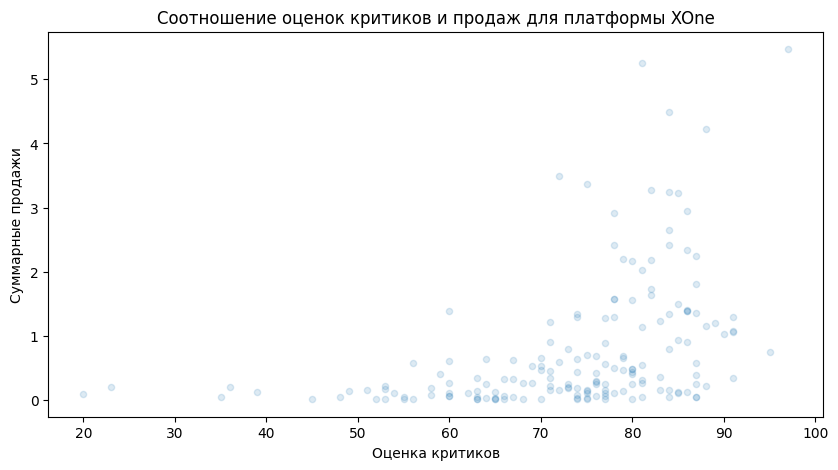

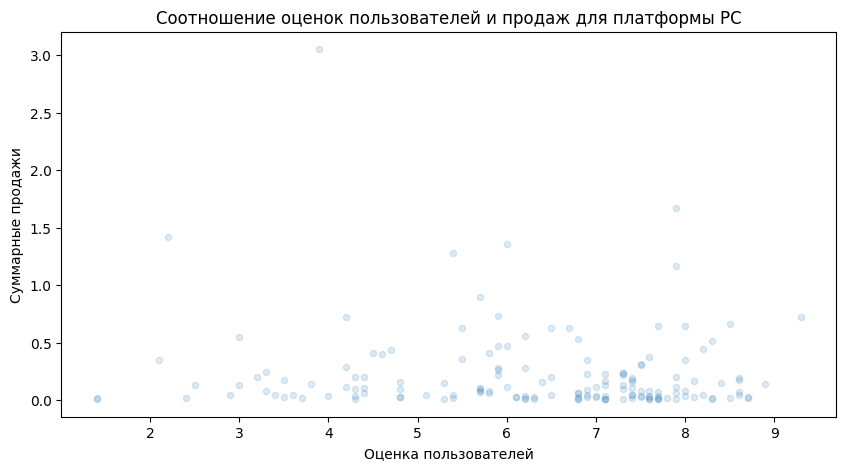

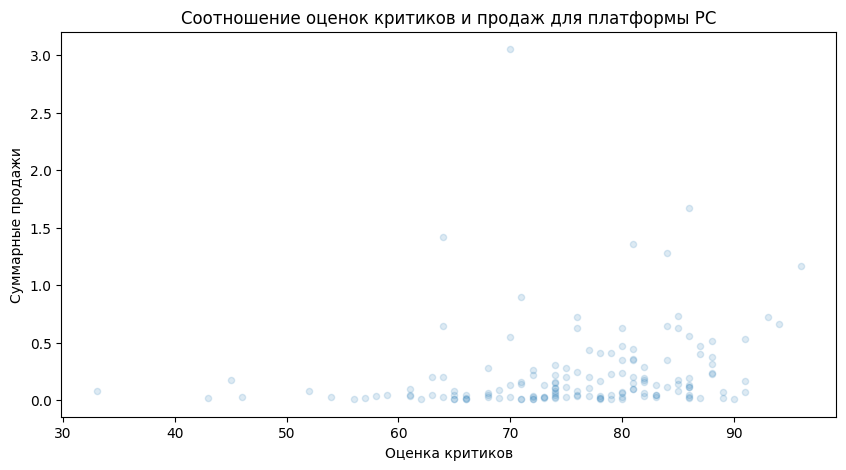

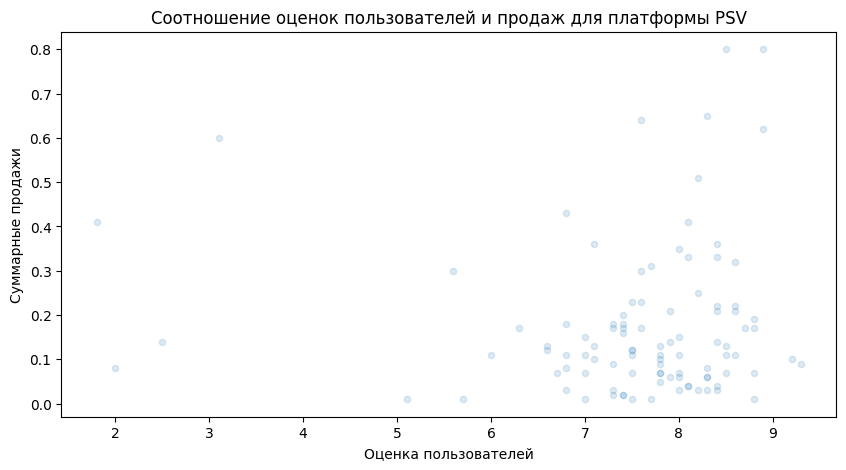

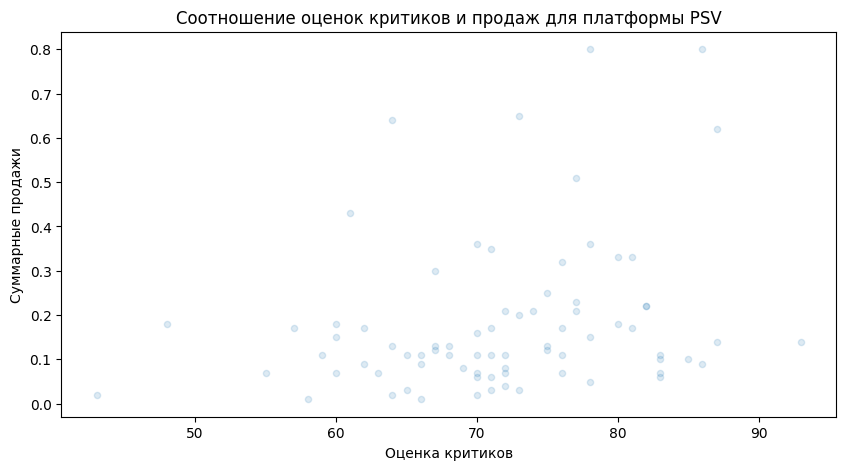

In [16]:
for p in ['PS4', 'WiiU', 'XOne', 'PC', 'PSV']:
    df_ps3 = df[df['platform']==p]
    df_ps3.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10, 5), alpha=0.15)
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Суммарные продажи')
    plt.title(f'Соотношение оценок пользователей и продаж для платформы {p}')
    print(f'Корреляция продаж и отзывов пользователей для платформы {p}: {df_ps3.total_sales.corr(df_ps3.user_score):.3}')

    df_ps3.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10, 5), alpha=0.15)
    plt.xlabel('Оценка критиков')
    plt.ylabel('Суммарные продажи')
    plt.title(f'Соотношение оценок критиков и продаж для платформы {p}')
    print(f'Корреляция продаж и отзывов критиков для платформы {p}: {df_ps3.total_sales.corr(df_ps3.critic_score):.3}')

Посмотрим на распределение игр по жанрам. Выделяются жанры с высокими продажами более 140 млн копий (экшены, стрелялки, ролевые и спортивные игры) и с низкими менее 10 млн (головоломки и стратегии). При этом наибольшие средние продажи у стрелялок и спортивных игр, а ниже всего у приключенческих игр, головоломок и стратегий:

In [17]:
(df.groupby('genre')['total_sales']
 .agg(['sum', 'mean']).round({'mean':2})
 .sort_values(by='sum', ascending=False)
 .set_axis(['Суммарные продажи (млн)', 'Средние продажи (млн)'], axis=1))

,Суммарные продажи (млн),Средние продажи (млн)
genre,,
Action,321.87,0.42
Shooter,232.98,1.25
Sports,150.65,0.70
Role-Playing,145.89,0.50
Misc,62.82,0.41
Platform,42.63,0.58
Racing,39.89,0.47
Fighting,35.31,0.44
Adventure,23.64,0.10


<a name="4"></a>

## Портрет пользователя каждого региона 

Посмотрим на портрет пользователей по регионам (Северная Америка, Европа, Япония).  
Для начала сравним, как отличается рейтинг платформ по регионам. Как видно, в Японии наиболее популярна платформа местной компании Nintendo, в Европе с отрывом лидируют различные версии PlayStation, а в Америке Xbox и PlayStation примерно наравне:

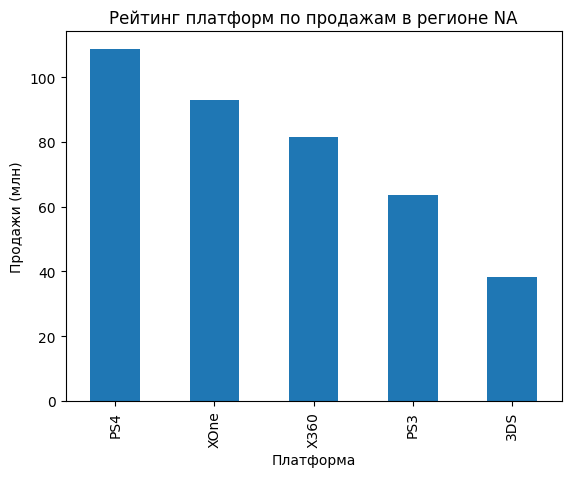

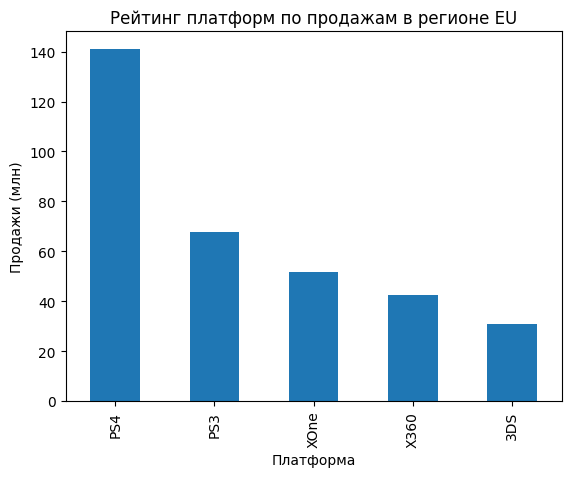

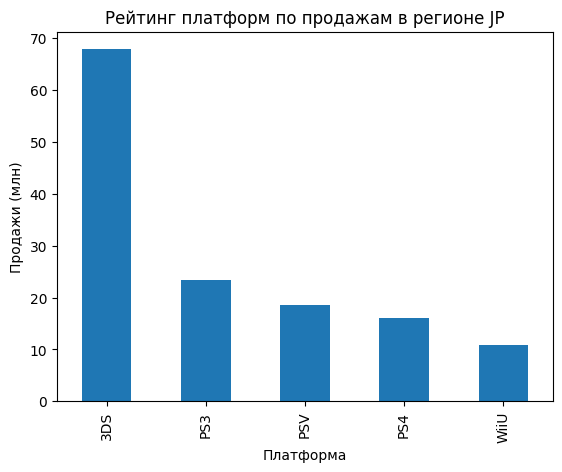

In [18]:
regions = df.columns[4:7]
df_grouped = df.groupby('platform')[regions].sum()
for r in regions:
    df_grouped[r].sort_values(ascending=False).head(5).plot(kind='bar')
    plt.title(f'Рейтинг платформ по продажам в регионе {r[:2].upper()}')
    plt.xlabel('Платформа')
    plt.ylabel('Продажи (млн)')
    plt.show()

Теперь посмотрим на различия в жанровых предпочтениях. Можно заметить, что пользователи СА и Европы почти не отличаются в этом смысле, предпочитая экшены, стрелялки, спортивные и ролевые игры. Жители Японии, напротив, выделяются высоким спросом на ролевые игры, а также наличием файтингов среди наиболее часто покумаемых жанров:

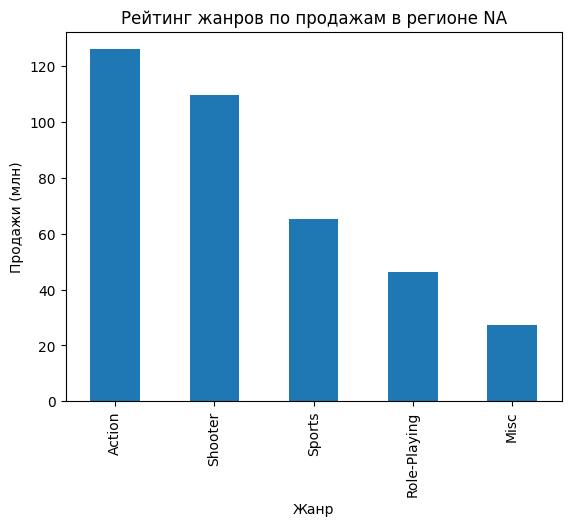

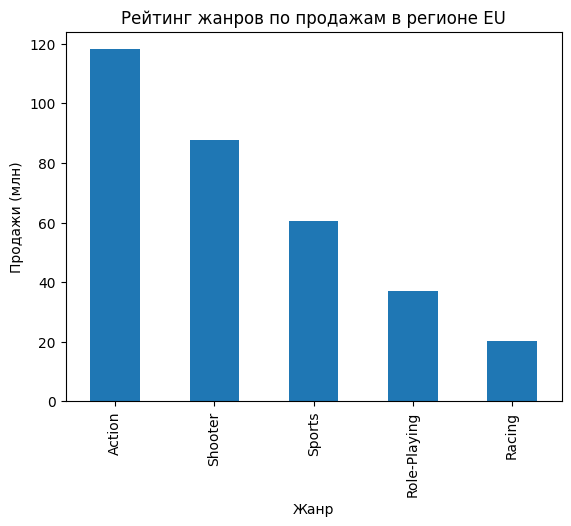

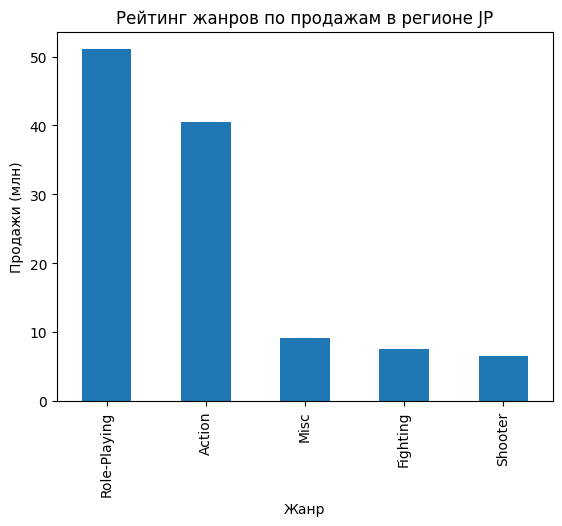

In [19]:
df_grouped = df.groupby('genre')[regions].sum()
for r in regions:
    df_grouped[r].sort_values(ascending=False).head(5).plot(kind='bar')
    plt.title(f'Рейтинг жанров по продажам в регионе {r[:2].upper()}')
    plt.xlabel('Жанр')
    plt.ylabel('Продажи (млн)')
    plt.show()

Теперь рассмотрим на влияние рейтинга ESRB на продажи. Посмотрим на распределение продаж по жанрам и топ-10 самых продаваемых игр в каждом регионе. Как видно, за исключением различий в платформах, предпочтения жителей СА и Европы очень похожи, а наиболее популярны крупные серии игр (GTA, CoD) с рейтингом M (17+). Единственная заметная разница - наличие футбольных игр в топе продаж для Европы, что объясняется популярностью этого вида спорта в данном регионе при его маргинальности в Америке. Это различие слегка повышает долю игр с рейтингом E для Европы (21% против 18%). Совсем иная картина в Японии, где популярны нишевые игры зачастую от местных издателей, не имеющие рейтинга ESRB или с рейтингом T (13+) или E (0+):

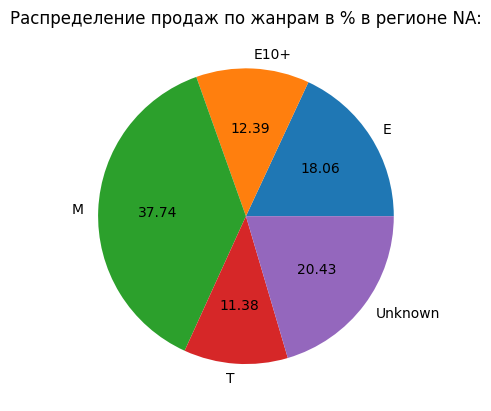

Топ 10 самых продаваемых игр в регионе NA:


,name,platform,na_sales,rating
0,Grand Theft Auto V,X360,9.66,M
1,Grand Theft Auto V,PS3,7.02,M
2,Call of Duty: Ghosts,X360,6.73,M
3,Call of Duty: Black Ops 3,PS4,6.03,Unknown
4,Minecraft,X360,5.70,Unknown
5,Pokemon X/Pokemon Y,3DS,5.28,Unknown
6,Call of Duty: Black Ops 3,XOne,4.59,Unknown
7,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,4.35,Unknown
8,Call of Duty: Ghosts,PS3,4.10,M
9,Grand Theft Auto V,PS4,3.96,M


'\n'

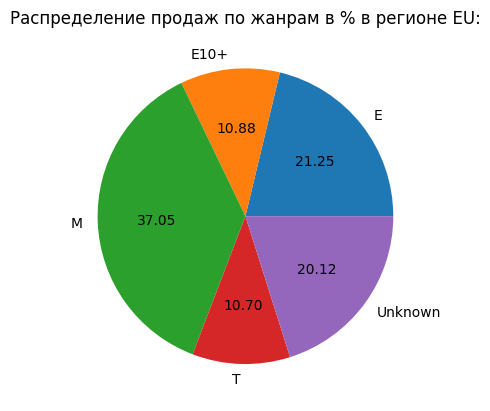

Топ 10 самых продаваемых игр в регионе EU:


,name,platform,eu_sales,rating
0,Grand Theft Auto V,PS3,9.09,M
1,Grand Theft Auto V,PS4,6.31,M
2,FIFA 16,PS4,6.12,E
3,Call of Duty: Black Ops 3,PS4,5.86,Unknown
4,FIFA 17,PS4,5.75,E
5,Grand Theft Auto V,X360,5.14,M
6,FIFA 15,PS4,4.33,E
7,FIFA 14,PS3,4.24,E
8,Pokemon X/Pokemon Y,3DS,4.19,Unknown
9,Call of Duty: Ghosts,PS3,3.63,M


'\n'

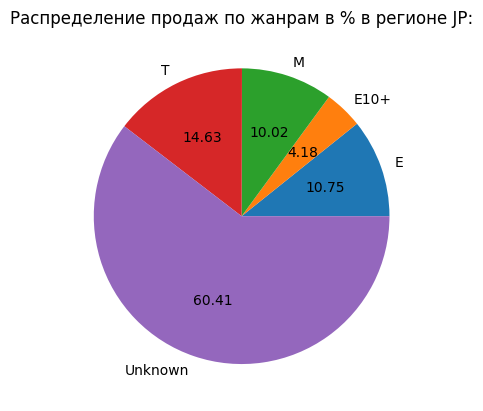

Топ 10 самых продаваемых игр в регионе JP:


,name,platform,jp_sales,rating
0,Pokemon X/Pokemon Y,3DS,4.35,Unknown
1,Monster Hunter 4,3DS,3.44,Unknown
2,Yokai Watch 2 Ganso/Honke,3DS,3.18,Unknown
3,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,3.10,Unknown
4,Monster Hunter X,3DS,2.79,Unknown
5,Yokai Watch 2 Shinuchi,3DS,2.68,Unknown
6,Monster Hunter 4 Ultimate,3DS,2.62,T
7,Super Smash Bros. for Wii U and 3DS,3DS,2.43,Unknown
8,Yokai Watch Busters,3DS,2.29,Unknown
9,Pokemon Sun/Moon,3DS,2.26,Unknown


'\n'

In [20]:
for r in regions:
    df_sorted = df[['name', 'platform', r, 'rating']].sort_values(by=r, ascending=False).reset_index(drop=True)
    df_sorted.groupby('rating')[r].sum().plot(kind='pie', autopct='%.2f')
    plt.title(f'Распределение продаж по жанрам в % в регионе {r[:2].upper()}:')
    plt.ylabel('')
    plt.show()
    print(f'Топ 10 самых продаваемых игр в регионе {r[:2].upper()}:')
    display(df_sorted.head(10), '\n')

<a name="5"></a>

## Проверка гипотез 

Проверим предположение о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Для этого сформулируем нулевую гипотезу о том, что эти средние равны. Альтернативная гипотеза - средние не равны. Как видим, отвергнуть нулевую гипотезу не получилось, что не позволяет опровергнуть исходное предположение:

In [21]:
alpha = 0.05
xbox, pc = df.loc[df['platform']=='XOne', 'user_score'].astype('float'), df.loc[df['platform']=='PC', 'user_score'].astype('float')
_, pvalue = st.ttest_ind(xbox.astype('float'), pc.astype('float'), alternative='two-sided', nan_policy='omit')
print(f'Средние: {xbox.mean():.3}, {pc.mean():.3}')
print(f'p-значение: {pvalue:.4}, уровень значимости: {alpha}')
if pvalue>alpha:
    print('Нулевая гипотеза не отвергнута')
else:
    print('Нулевая гипотеза отвергнута')

Средние: 6.52, 6.27
p-значение: 0.1401, уровень значимости: 0.05
Нулевая гипотеза не отвергнута


Проверим предположение о том, что средние пользовательские рейтинги жанров Action и Sports разные. Для этого сформулируем нулевую гипотезу о том, что эти средние равны. Альтернативная гипотеза - средние не равны. Как видим, отвергнуть нулевую гипотезу получилось, что позволяет сделать вывод об отличии пользовательских рейтингов для данных жанров:

In [22]:
alpha = 0.05
action, sports = df.loc[df['genre']=='Action', 'user_score'].astype('float'), df.loc[df['genre']=='Sports', 'user_score'].astype('float')
_, pvalue = st.ttest_ind(action, sports, alternative='two-sided', nan_policy='omit')
print(f'Средние: {action.mean():.3}, {sports.mean():.3}')
print(f'p-значение: {pvalue:.4E}, уровень значимости: {alpha}')
if pvalue>alpha:
    print('Нулевая гипотеза не отвергнута')
else:
    print('Нулевая гипотеза отвергнута')

Средние: 6.84, 5.24
p-значение: 1.0518E-27, уровень значимости: 0.05
Нулевая гипотеза отвергнута


<a name="6"></a>

## Вывод 

1. В рамках проекта по аналитике для интернет-магазина "Стримчик" велась работа с датасетом, в котором содержалась информация об играх. Были считаны данные о 16715 играх, включающие в себя следующие столбцы:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

2. Произведена предобработка данных:
- названия столбцов приведены к нижнему регистру
- в столбцах name, genre и year_of_release, где количество пропусков не велико (менее 2%), удалены строки с пропусками
- выявлен неслучайный характер пропущенных значений user_score и critic_score, их решено оставить
- удалены неактуальные значения в столбце rating, а пропуски заменены на 'Unknown'
- изменены типы столбцов year_of_release (с float на int) и user_score (с object на float).

3. В рамках исследовательского анализа данных описаны:
- количество игр по годам выпуска (современный объём выпуск игр достигнут в 2001-2002 году)
- наиболее популярные платформы в каждый год выпуска (средняя длительность жизни популярной платформы от 5 до 9 лет)
- наиболее пригодные для прогноза на 2017 год данные (решено оставить только данные с 2013 по 2016 год)
- наиболее прибыльные в 2016 году платформы PS4 (164 млн), Xbox One (87 млн), PSV (83 млн), ПК (54 млн); с учётом тенденций за последние годы, именно у PS4, Xbox One и ПК есть наибольшая вероятность продемонстрировать рост и высокие результаты продаж в 2017 году
- разброс глобальных продаж игр в разбивке по платформам; на актуальных платформах основная часть игр (более 75%) имеет от 0.11 до 0.8 млн продаж, при этом существует группа игр с большими продажами (максимально от 1.96 до 21.05 млн)
- влияние на продажи отзывов пользователей и критиков в рамках популярных платформ (корреляции не выявлено ни для одной платформы, во всех случаях коэффициент не превышает 0.42)
- распределение игр по жанрам и их прибыльность (выделяются жанры с высокими продажами - экшены, стрелялки, ролевые и спортивные игры - и с низкими - головоломки и стратегии; при этом средние продажи выше всего для стрелялок и спортивных игр, а ниже всего для приключенческих игр, стратегий и головоломок)

4. Построен портрет пользователя каждого региона (СА, Европа, Япония):
- в Японии наиболее популярна платформа от Nintendo, в Европе с отрывом лидируют различные версии PlayStation, а в Америке Xbox и PS примерно наравне
- жанровые предпочтения пользователей СА и Европы почти не отличаются (экшены, стрелялки, спортивные и ролевые игры); жители Японии выделяются высоким спросом на ролевые игры и относительно высоким на файтинги
- влияние рейтинга на предпочтения жителей СА и Европы очень схоже, единственная заметная разница - наличие футбольных игр в топе продаж для Европы, что слегка повышает долю игр с рейтингом E для Европы (21% против 18%); совсем иная картина в Японии, где популярны нишевые игры с без рейтинга ESRB, а также рейтингом T (13+) или E (0+)

5. На уровне значимости 5% проверены следующие предположения:
- 1) Пользовательские рейтинги платформ Xbox One и PC одинаковые. **Результат:** нулевую гипотезу не удалось отвергнуть, предположение остаётся вероятным.
- 2) Средние пользовательские рейтинги жанров Action и Sports разные. **Результат:** нулевую гипотезу удалось отвергнуть, предположение можно считать верным.